In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/K-Medoids_clustering/전국_LPG충전소_현황_경도위도.csv')


In [4]:
df

,행정 구역,업소명,소재지,전화번호,관리구분,입력주소,경도,위도
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),02-445-3300,자동차충전,서울 강남구 자곡동 373-1 (1층),127.105495,37.476386
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,02-3463-6811,자동차충전,서울 강남구 도곡동 552-4,127.035691,37.490497
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,02-3412-2828,자동차충전,서울 강남구 대치동 27-15,127.078101,37.499342
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,02-3411-4411,용기+자동차+13kg용기,서울 강남구 대치동 21-1,127.075564,37.497799
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,02-445-1083,자동차충전,서울 강남구 자곡동 204-1.3,127.113228,37.481193
...,...,...,...,...,...,...,...,...
2036,제주 제주시,(주)천마와산충전소,제주 제주시 조천읍 와산리 1286,064-784-3205,용기+탱크+13kg용기,제주 제주시 조천읍 와산리 1286,126.678237,33.471562
2037,제주 제주시,정우오라엘피지충전소,제주 제주시 오라2동 1552-1외1필지,064-749-1123,자동차충전,제주 제주시 오라2동 1552-1외1필지,126.515456,33.482576
2038,제주 제주시,굿모닝엘피지충전소,제주 제주시 용담2동 1543,064-745-1151,자동차충전,제주 제주시 용담2동 1543,126.499206,33.504622
2039,제주 제주시,제주오케이충전소,"제주 제주시 이호2동 1580,1581,1582",064-749-5188,자동차충전,"제주 제주시 이호2동 1580,1581,1582",126.457233,33.495064


In [5]:
df = df[df['행정 구역'].str.contains('서울')]
df

,행정 구역,업소명,소재지,전화번호,관리구분,입력주소,경도,위도
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),02-445-3300,자동차충전,서울 강남구 자곡동 373-1 (1층),127.105495,37.476386
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,02-3463-6811,자동차충전,서울 강남구 도곡동 552-4,127.035691,37.490497
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,02-3412-2828,자동차충전,서울 강남구 대치동 27-15,127.078101,37.499342
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,02-3411-4411,용기+자동차+13kg용기,서울 강남구 대치동 21-1,127.075564,37.497799
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,02-445-1083,자동차충전,서울 강남구 자곡동 204-1.3,127.113228,37.481193
...,...,...,...,...,...,...,...,...
74,서울 은평구,은평서부충전소,서울 은평구 진관동 35 (은평서부충전소 제1동),02-352-4806,자동차충전,서울 은평구 진관동 35 (은평서부충전소 제1동),126.921229,37.643674
75,서울 중랑구,신내LPG충전소,서울 중랑구 신내동 317-7,02-2208-5151,자동차충전,서울 중랑구 신내동 317-7,127.098130,37.613902
76,서울 중랑구,(주)풍림에너지,서울 중랑구 면목5동 169-6,02-434-0557,자동차충전,서울 중랑구 면목5동 169-6,127.079308,37.579608
77,서울 중랑구,동일석유(주)황금충전소,서울 중랑구 중화2동 208-11,02-435-2627,자동차충전,서울 중랑구 중화2동 208-11,127.075901,37.594187


In [6]:
df.rename(columns={'경도':'X', '위도':'Y'}, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,행정 구역,업소명,소재지,전화번호,관리구분,입력주소,X,Y
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),02-445-3300,자동차충전,서울 강남구 자곡동 373-1 (1층),127.105495,37.476386
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,02-3463-6811,자동차충전,서울 강남구 도곡동 552-4,127.035691,37.490497
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,02-3412-2828,자동차충전,서울 강남구 대치동 27-15,127.078101,37.499342
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,02-3411-4411,용기+자동차+13kg용기,서울 강남구 대치동 21-1,127.075564,37.497799
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,02-445-1083,자동차충전,서울 강남구 자곡동 204-1.3,127.113228,37.481193
...,...,...,...,...,...,...,...,...
74,서울 은평구,은평서부충전소,서울 은평구 진관동 35 (은평서부충전소 제1동),02-352-4806,자동차충전,서울 은평구 진관동 35 (은평서부충전소 제1동),126.921229,37.643674
75,서울 중랑구,신내LPG충전소,서울 중랑구 신내동 317-7,02-2208-5151,자동차충전,서울 중랑구 신내동 317-7,127.098130,37.613902
76,서울 중랑구,(주)풍림에너지,서울 중랑구 면목5동 169-6,02-434-0557,자동차충전,서울 중랑구 면목5동 169-6,127.079308,37.579608
77,서울 중랑구,동일석유(주)황금충전소,서울 중랑구 중화2동 208-11,02-435-2627,자동차충전,서울 중랑구 중화2동 208-11,127.075901,37.594187


In [7]:
df_lpg = df[['X','Y']]
df_lpg

,X,Y
0,127.105495,37.476386
1,127.035691,37.490497
2,127.078101,37.499342
3,127.075564,37.497799
4,127.113228,37.481193
...,...,...
74,126.921229,37.643674
75,127.098130,37.613902
76,127.079308,37.579608
77,127.075901,37.594187


In [11]:
ary_lpg = df_lpg.to_numpy()
ary_lpg

array([[127.1054946,  37.4763862],
       [127.035691 ,  37.4904973],
       [127.0781008,  37.4993418],
       [127.0755638,  37.4977992],
       [127.1132277,  37.4811931],
       [127.1277832,  37.5518269],
       [127.1699368,  37.5450305],
       [127.1289795,  37.5365449],
       [127.1465229,  37.5251936],
       [127.043997 ,  37.628235 ],
       [127.0281019,  37.6361063],
       [127.0218713,  37.6343068],
       [126.798196 ,  37.5380658],
       [126.7689748,  37.5549293],
       [126.8607405,  37.5584815],
       [126.7682248,  37.5558045],
       [126.8583819,  37.5535751],
       [126.8473231,  37.530167 ],
       [126.7991656,  37.587641 ],
       [126.8172554,  37.5420516],
       [126.8015717,  37.5752764],
       [126.8302094,  37.5747888],
       [126.8176643,  37.5706092],
       [126.8166975,  37.5852051],
       [126.9343062,  37.4735606],
       [126.9534667,  37.4737228],
       [127.0836974,  37.5346254],
       [127.0737196,  37.5600832],
       [127.0766248,

In [8]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [9]:
from sklearn_extra.cluster import KMedoids
import numpy as np

In [12]:
# M, C = sklearn_extra.cluster.KMedoids(D, 4)
kmedoids = KMedoids(n_clusters=4, metric='euclidean', max_iter=300, random_state=0).fit(ary_lpg)

In [13]:
kmedoids.labels_

array([2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 3, 0, 3, 3, 3, 3, 3, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1])

In [14]:
df_lpg['cluster'] = kmedoids.labels_
df_lpg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,X,Y,cluster
0,127.105495,37.476386,2
1,127.035691,37.490497,3
2,127.078101,37.499342,2
3,127.075564,37.497799,2
4,127.113228,37.481193,2
...,...,...,...
74,126.921229,37.643674,1
75,127.098130,37.613902,1
76,127.079308,37.579608,2
77,127.075901,37.594187,1


In [15]:
centers = kmedoids.cluster_centers_
centers

array([[126.8473231,  37.530167 ],
       [127.043997 ,  37.628235 ],
       [127.0836974,  37.5346254],
       [126.9821327,  37.4790732]])

In [16]:
df_center = pd.DataFrame(centers)
df_center

,0,1
0,126.847323,37.530167
1,127.043997,37.628235
2,127.083697,37.534625
3,126.982133,37.479073


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

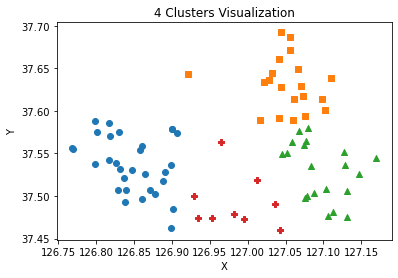

In [18]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df_lpg[df_lpg['cluster']==0].index
marker1_ind = df_lpg[df_lpg['cluster']==1].index
marker2_ind = df_lpg[df_lpg['cluster']==2].index
marker3_ind = df_lpg[df_lpg['cluster']==3].index


# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 X, Y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df_lpg.loc[marker0_ind,'X'], y=df_lpg.loc[marker0_ind,'Y'], marker='o') 
plt.scatter(x=df_lpg.loc[marker1_ind,'X'], y=df_lpg.loc[marker1_ind,'Y'], marker='s')
plt.scatter(x=df_lpg.loc[marker2_ind,'X'], y=df_lpg.loc[marker2_ind,'Y'], marker='^')
plt.scatter(x=df_lpg.loc[marker3_ind,'X'], y=df_lpg.loc[marker3_ind,'Y'], marker='P')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Clusters Visualization')
plt.show()

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

In [20]:
map=folium.Map(location=[df_lpg['Y'].mean(),df_lpg['X'].mean()], zoom_start=11.5 )

for i in df_lpg.index:
  folium.Marker([ df_lpg.loc[i,'Y'], df_lpg.loc[i,'X'] ], icon=folium.Icon(color='red')).add_to(map)    
  folium.CircleMarker( [ df_lpg.loc[i,'Y'], df_lpg.loc[i,'X'] ], radius=10,color='red',fill_color='red').add_to(map)   

map

In [21]:
df_center

,0,1
0,126.847323,37.530167
1,127.043997,37.628235
2,127.083697,37.534625
3,126.982133,37.479073


In [22]:
map=folium.Map(location=[df_lpg['Y'].mean(),df_lpg['X'].mean()], zoom_start=11.5 )

# for i in df_lpg.index:
  # folium.Marker([ df_lpg.loc[i,'Y'], df_lpg.loc[i,'X'] ], icon=folium.Icon(color='red')).add_to(map)    
  # folium.CircleMarker( [ df_lpg.loc[i,'Y'], df_lpg.loc[i,'X'] ], radius=10,color='red',fill_color='red').add_to(map)

for i in df_center.index:
  folium.Marker([ df_center.loc[i,1], df_center.loc[i,0] ], icon=folium.Icon(color='blue')).add_to(map)       

map

In [23]:
map=folium.Map(location=[df_lpg['Y'].mean(),df_lpg['X'].mean()], zoom_start=11.5 )

for i in df_lpg.index:
  folium.Marker([ df_lpg.loc[i,'Y'], df_lpg.loc[i,'X'] ], icon=folium.Icon(color='red')).add_to(map)    
  folium.CircleMarker( [ df_lpg.loc[i,'Y'], df_lpg.loc[i,'X'] ], radius=10,color='red',fill_color='red').add_to(map)

for i in df_center.index:
  folium.Marker([ df_center.loc[i,1], df_center.loc[i,0] ], icon=folium.Icon(color='blue')).add_to(map)       

map